In [1]:
from init import *

# Bermudan Option

In [2]:
def create_model (
    t0              = 0,
    tmax            = 1,
    stock_spot      = 36,
    stock_drift     = 0.06,
    stock_diffusion = 0.2,
    rate_start      = 0.06,
    rate_drift      = 0,
    rate_diffusion  = 0,
    strike          = 40,
    NumExercises    = 20,
    TimeSteps       = 100,
    NumPaths        = 100000
):
    model = sdk.Model()
    model.TimeStart = 0
    model.TimeSteps = TimeSteps
    model.NumPaths = NumPaths

    model.stock = model.Add(sdk.GeometricalBrownianMotion(start=stock_spot,drift=stock_drift,diffusion=stock_diffusion,title='stock'))
    model.rate  = model.Add(sdk.BrownianMotion(start=rate_start,drift=rate_drift,diffusion=rate_diffusion,title='rate'))
    model.df    = model.Add(sdk.ZeroCouponBond(underlying=model.rate.GetStateNumber(),start=1,title=f'df'))

    bo_args = [strike,sdk.Option.Put,NumExercises]
    dt = (tmax-t0) / (NumExercises-1)
    for i in range(NumExercises):
        bo_args.append(t0+dt*i)
        
    model.bo    = model.Add(sdk.Updater(
        name='BermudanOption',
        refs=[f.GetStateNumber() for f in [model.stock,model.df]],
        args=bo_args,
        title=f'BermudanOption'
    ))
    
    for time in [t0,tmax]:
        model.evaluations.append(sdk.EvaluationPoint(time)
            .Add(sdk.Histogram(
                ax = sdk.HistogramAxis(
                    model.stock.GetStateNumber(),
                    50
                ),
            ))
        )
    
    return model

In [3]:
model = create_model()

# TimeHorizon = 10
# for t in [model.TimeStart,TimeHorizon]:
#     model.evaluations.append(sdk.EvaluationPoint(t)
#         .Add(sdk.Histogram(
#             ax = sdk.HistogramAxis(
#                 model.hw_uf.GetStateNumber(),
#                 50
#             ),
#         ))
#         .Add(sdk.Histogram(
#             ax = sdk.HistogramAxis(
#                 model.df_uf.GetStateNumber(),
#                 50,0,2
#             ),
#         ))
#     )

results = sdk.run (model, server)
results.df()

,name,title,state,point,time,step,npaths,mean,mean_error,stddev,skewness
0,GeometricalBrownianMotion,stock,0,0,0.0,-1,100000,36.000000,0.000000e+00,0.000000,NaN
1,BrownianMotion,rate,1,0,0.0,-1,100000,0.060000,7.515012e-08,0.000024,-4299.476074
2,ZeroCouponBond,df,2,0,0.0,-1,100000,1.000000,0.000000e+00,0.000000,NaN
3,BermudanOption,BermudanOption,3,0,0.0,-1,24746,3.922894,9.896369e-03,1.556784,0.048513
4,GeometricalBrownianMotion,stock,0,1,1.0,99,100000,38.218273,2.442924e-02,7.725204,0.608656
5,BrownianMotion,rate,1,1,1.0,99,100000,0.060000,7.515012e-08,0.000024,-4299.476074
6,ZeroCouponBond,df,2,1,1.0,99,100000,0.941749,NaN,NaN,NaN
7,BermudanOption,BermudanOption,3,1,1.0,99,0,NaN,NaN,0.000000,0.000000


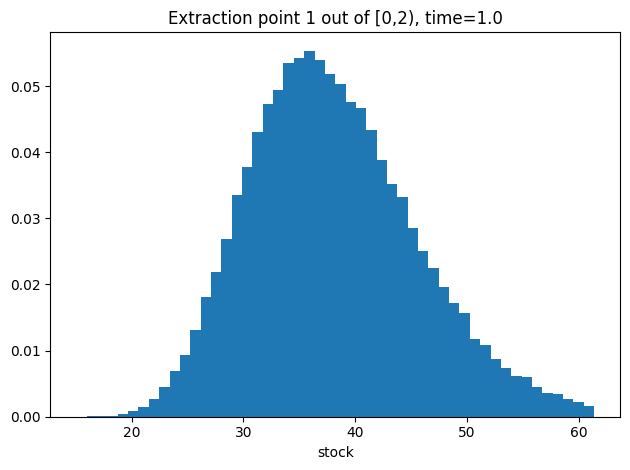

In [4]:
plot(results,1,model.stock.GetStateNumber())

In [5]:
# def show_histograms2(results):
#     def add_axis(d,name,a):
#         return {f'{name} title':a.title,f'{name} bins':a.nbins,f'{name} min':a.min,f'{name} max':a.max}
    
#     def add_histogram(h):
#         d = {'Title':h.Title,'TimeStep':h.TimeStep,'EPoint':h.EvaluationPoint}
#         for a,xyz in [(h.AxisX,'X'),(h.AxisY,'Y'),(h.AxisZ,'Z')]:
#             if a:
#                 d = d | add_axis(d,xyz,a)
#         return d
    
#     return pd.DataFrame([add_histogram(h) for h in results.histograms2])
show_histograms2(results)

,Title,TimeStep,EPoint,X title,X bins,X min,X max,Y title,Y bins,Y min,Y max
0,Exer,99,-1,discounted payoff,100,-6.086085,19.102093,NaN,NaN,NaN,NaN
1,df*payoff vs S on exercice 18,99,-1,underlying S,50,21.114233,46.046432,df*payoff,50.0,-6.086085,19.102093
2,df*payoff vs S on exercice 17,99,-1,underlying S,50,21.493031,45.910076,df*payoff,50.0,-6.024710,18.817894
3,df*payoff vs S on exercice 16,99,-1,underlying S,50,21.793379,45.824905,df*payoff,50.0,-5.892400,18.451555
4,df*payoff vs S on exercice 15,99,-1,underlying S,50,22.144417,45.683571,df*payoff,50.0,-5.807472,18.152088
5,df*payoff vs S on exercice 14,99,-1,underlying S,50,22.506659,45.534527,df*payoff,50.0,-5.666517,17.802063
6,df*payoff vs S on exercice 13,99,-1,underlying S,50,22.932119,45.375435,df*payoff,50.0,-5.514643,17.430473
7,df*payoff vs S on exercice 12,99,-1,underlying S,50,23.329287,45.231220,df*payoff,50.0,-5.359354,17.016769
8,df*payoff vs S on exercice 11,99,-1,underlying S,50,23.727970,45.075359,df*payoff,50.0,-5.215606,16.620825
9,df*payoff vs S on exercice 10,99,-1,underlying S,50,24.162840,44.900803,df*payoff,50.0,-5.060218,16.223347


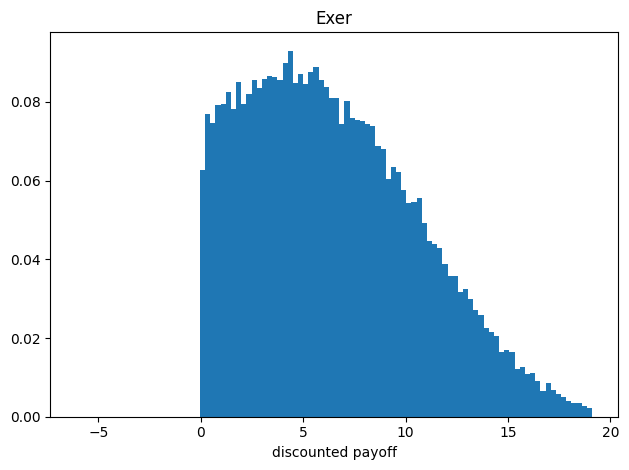

In [6]:
plot2(results.histograms2[0])

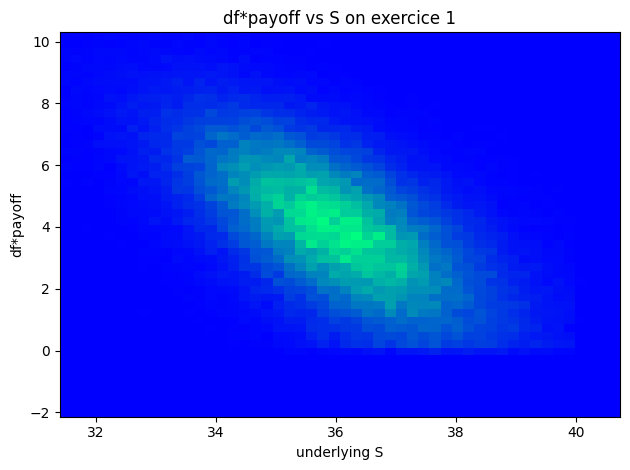

1517


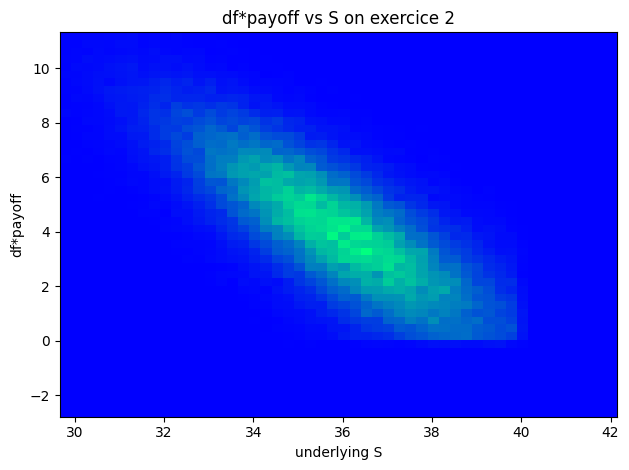

1185


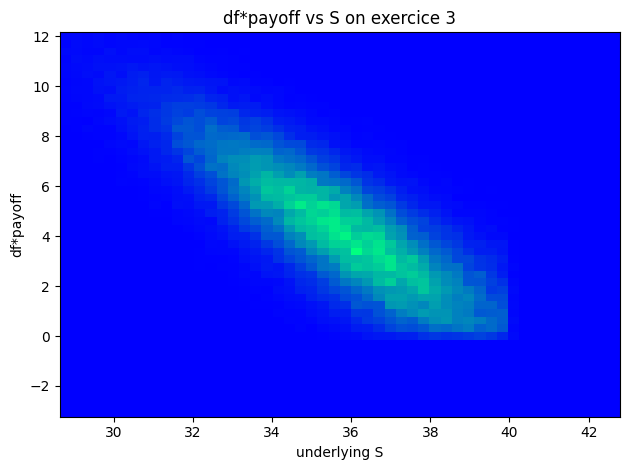

1067


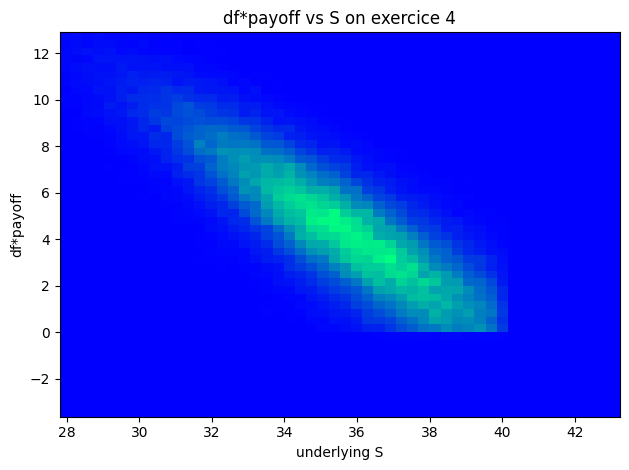

997


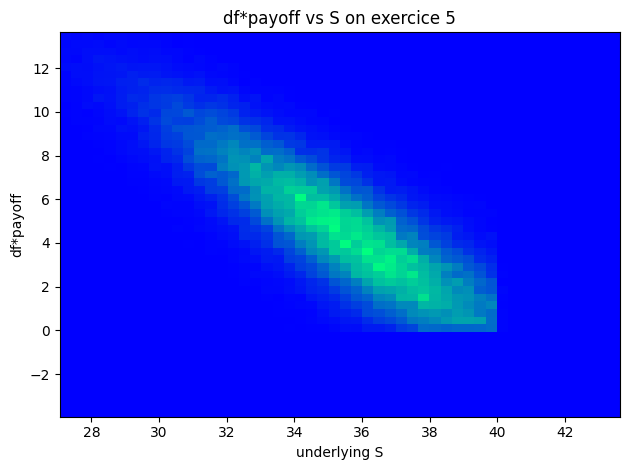

965


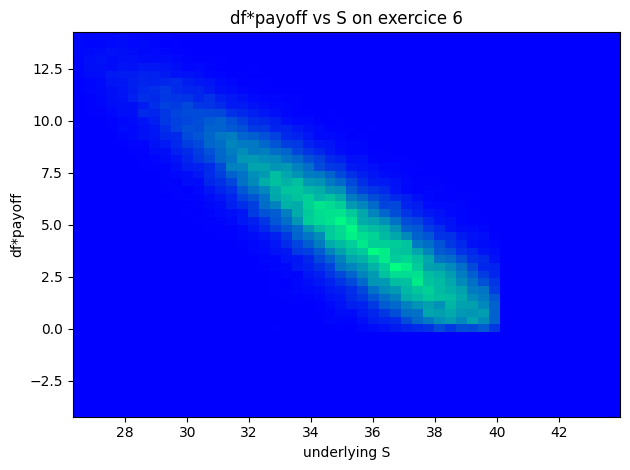

876


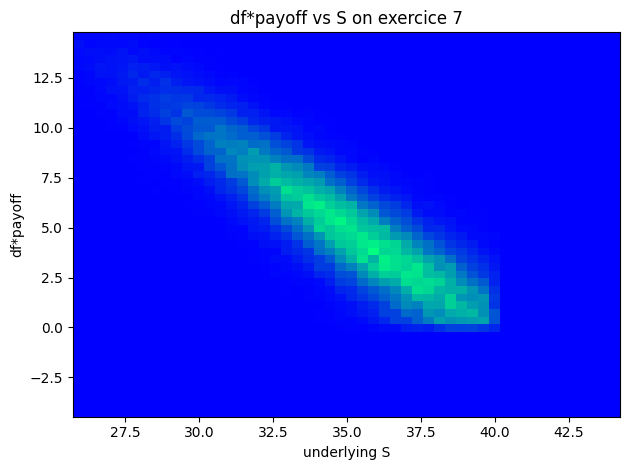

833


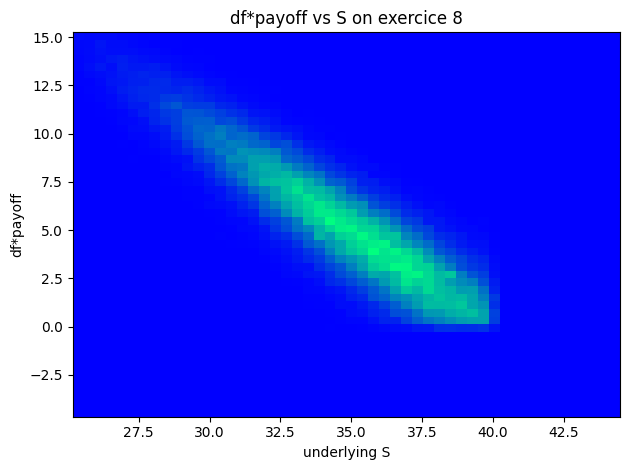

795


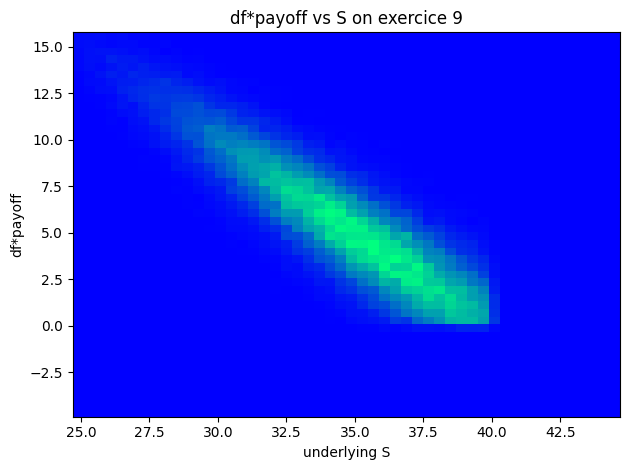

825


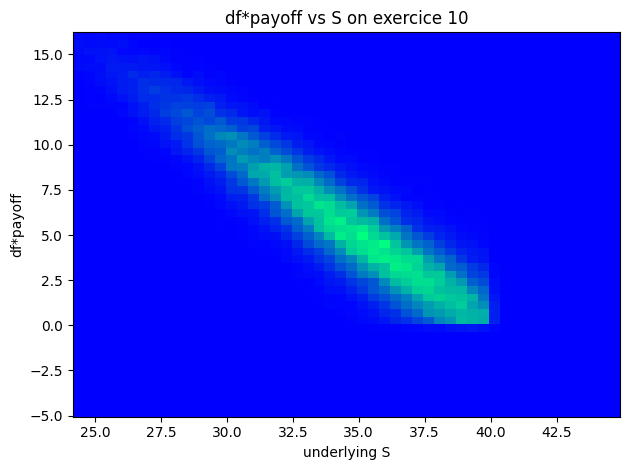

763


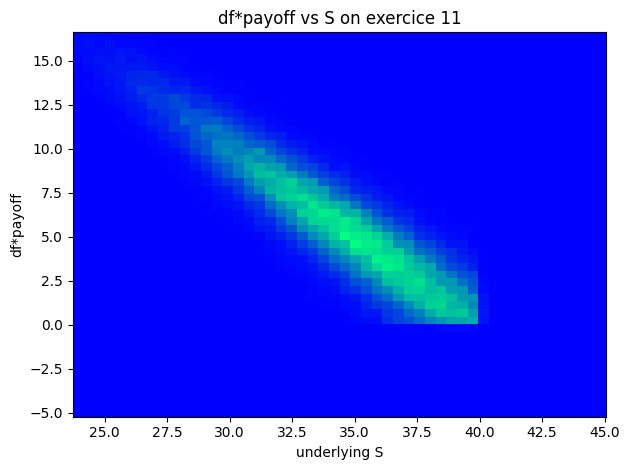

737


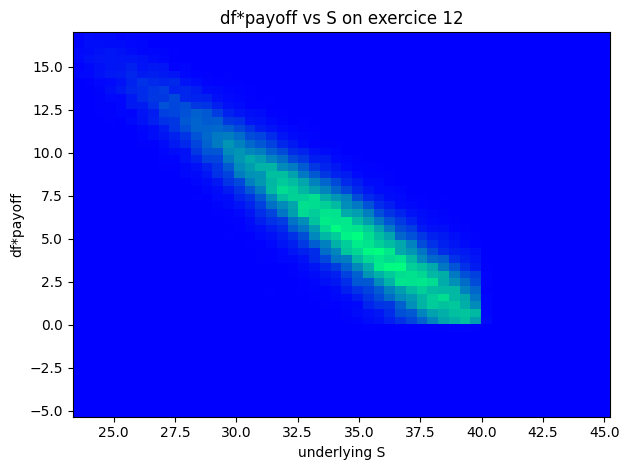

713


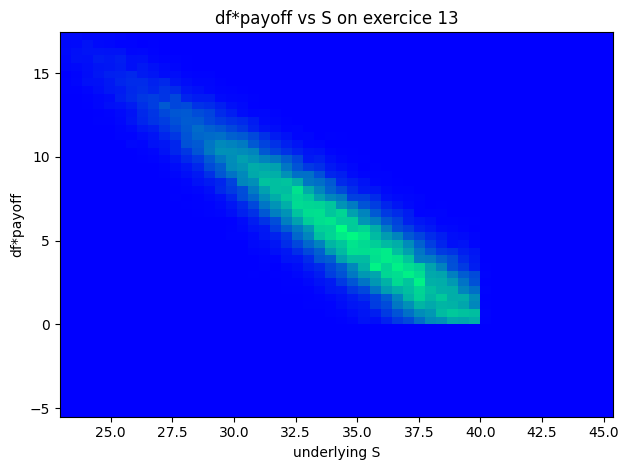

732


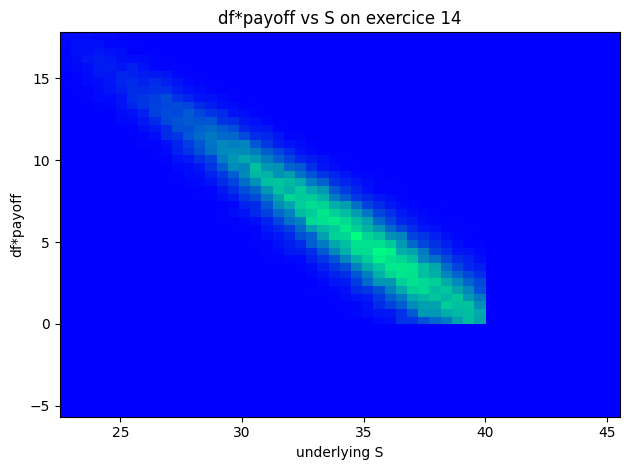

654


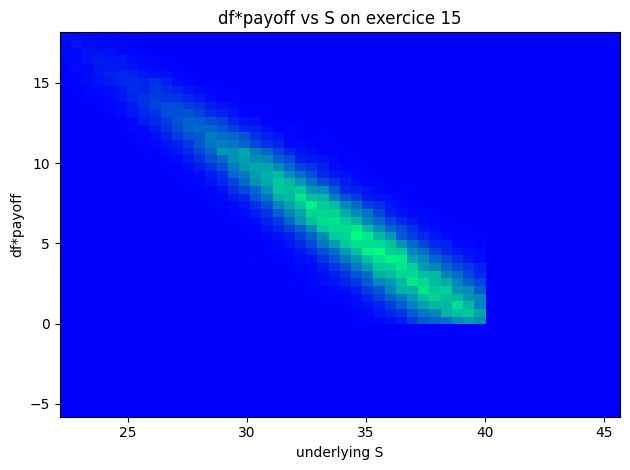

645


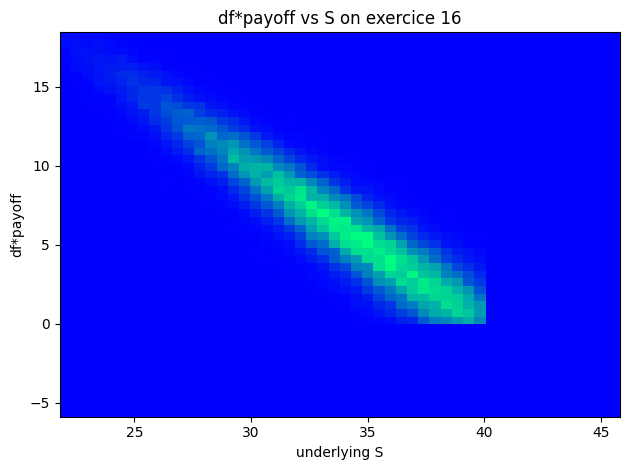

647


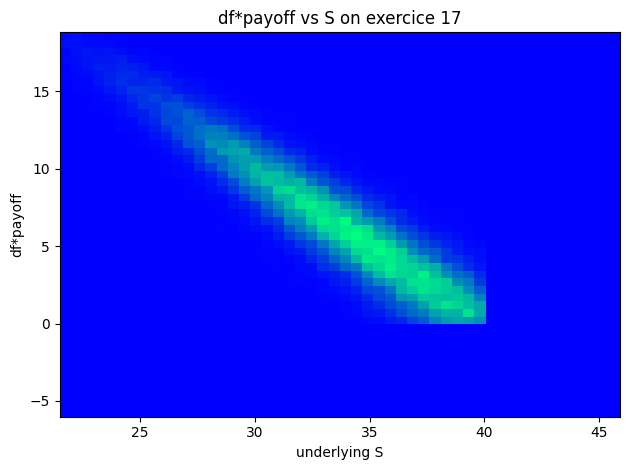

665


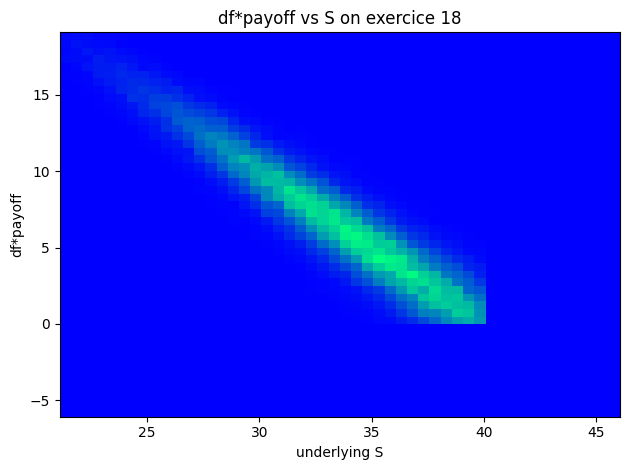

618


In [14]:
for h in results.histograms2[::-1][:-1]:
    plot2(h)
    # print(len([b for b in h.Bins if b>0.5]))
        